# Autor: Daniel Oviedo

# Visualizaciones de series de tiempo 

https://github.com/jpospinalo/time-series

1. Cargue en un dataframe el archivo vic_elec.csv disponible en este repositorio

2. Asigne a los índices de dataframe la columna Time Ajuste los índices para que cumplan con el formato: %Y-%m-%d %H:%M:%S

3. Cree un nuevo dataframe que contenga únicamente los datos del 2014

4. Agregue una nueva columna llamada Day_Type.
5. Según el día de la semana que corresponda la columna deberá tener los siguientes valores:
  * "Weekday": para días de lunes a viernes que no son festivos
  * "Weekend": para sábados y domingos que nos son festivos
  * "Holiday": para cualquier día festivo

Utilice la columna “Holiday” y funciones como weekday() del módulo datetime o similares para realizar el cálculo.

6. En un gráfico, visualice la demanda y la temperatura para el año 2014 (cada uno en su propio gráfico)  

7. Agregue la media móvil a cada uno.

8. Determine un tamaño de ventana que permita visualizar de manera clara la tendencia.
  * ¿Puede encontrar alguna relación entre la temperatura y el consumo de energía a partir de los dos gráficos anteriores? Explique su respuesta.

9. Realice un diagrama de dispersión con la temperatura en el eje x y la demanda en el eje y.
  * ¿Qué conclusiones podemos obtener a partir del gráfico?

10. Realice nuevamente un gráfico de dispersión como en el punto anterior, pero ahora visualizando los valores de la columna “Day_type” cada uno en un color diferente.
  * ¿Qué conclusiones podemos obtener a partir del gráfico?

11. Genere una matriz de dispersión para las columnas de la 2 a la 6 del archivo us_change.csv disponible en repositorio.
  * ¿Qué conclusiones podemos obtener a partir del gráfico?
  
---

NOTA: Todos los índices de los dataframes deben convertise a objetos de tipo Datetime. Se calificará el análisis realizado más que los gráficos o código.

In [ ]:
# Lectura librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
# Cargar URL (Punto 1)
url = 'https://raw.githubusercontent.com/jpospinalo/time-series/main/vic_elec.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Time,Demand,Temperature,Date,Holiday
0,1,2012-01-01,4382.825174,21.40,2012-01-01,True
1,2,2012-01-01 00:30:00,4263.365526,21.05,2012-01-01,True
2,3,2012-01-01 01:00:00,4048.966046,20.70,2012-01-01,True
3,4,2012-01-01 01:30:00,3877.563330,20.55,2012-01-01,True
4,5,2012-01-01 02:00:00,4036.229746,20.40,2012-01-01,True


In [ ]:
# Colocar '00:00:00' a las filas en la columna 'Time' que no tengan hora
# para evitar valores nulos
df['Time'] = df['Time'].apply(lambda x: x if len(x) > 10 else x + ' 00:00:00')
df.head()

,Unnamed: 0,Time,Demand,Temperature,Date,Holiday
0,1,2012-01-01 00:00:00,4382.825174,21.40,2012-01-01,True
1,2,2012-01-01 00:30:00,4263.365526,21.05,2012-01-01,True
2,3,2012-01-01 01:00:00,4048.966046,20.70,2012-01-01,True
3,4,2012-01-01 01:30:00,3877.563330,20.55,2012-01-01,True
4,5,2012-01-01 02:00:00,4036.229746,20.40,2012-01-01,True


In [ ]:
# Asignamos el formato establecido %Y-%m-%d %H:%M:%S (Punto 2)
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Establecer la columna 'Time' como índice del DataFrame
df.set_index('Time', inplace=True)
df.head()

,Unnamed: 0,Demand,Temperature,Date,Holiday
Time,,,,,
2012-01-01 00:00:00,1,4382.825174,21.40,2012-01-01,True
2012-01-01 00:30:00,2,4263.365526,21.05,2012-01-01,True
2012-01-01 01:00:00,3,4048.966046,20.70,2012-01-01,True
2012-01-01 01:30:00,4,3877.563330,20.55,2012-01-01,True
2012-01-01 02:00:00,5,4036.229746,20.40,2012-01-01,True


In [ ]:
# Convertir columna Date a datetime para poder filtrar los datos
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.dtypes

,0
Unnamed: 0,int64
Demand,float64
Temperature,float64
Date,datetime64[ns]
Holiday,bool


In [ ]:
# Filtramos para obtener unicamente los datos del 2014 (Punto 3)
df2014 = df[df['Date'].dt.year == 2014]
df2014.head()

,Unnamed: 0,Demand,Temperature,Date,Holiday
Time,,,,,
2014-01-01 00:00:00,35089,4091.593434,18.7,2014-01-01,True
2014-01-01 00:30:00,35090,4198.398912,18.1,2014-01-01,True
2014-01-01 01:00:00,35091,3914.647130,18.2,2014-01-01,True
2014-01-01 01:30:00,35092,3672.549608,17.9,2014-01-01,True
2014-01-01 02:00:00,35093,3497.539030,17.6,2014-01-01,True


In [ ]:
# Crear la columna 'Day_Type' en función del tipo de día (Punto 4 y Punto 5)
df2014['Day_Type'] = (
    df2014['Date'].dt.weekday < 5
).replace({True: 'Weekday', False: 'Weekend'})

# Holiday's
df2014['Day_Type'] = df2014.apply(
    lambda row: row['Day_Type'] + ', Holiday' if row['Holiday'] else row['Day_Type'], axis=1
)
df2014


<ipython-input-7-a79d6f54b6a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2014['Day_Type'] = (
<ipython-input-7-a79d6f54b6a9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2014['Day_Type'] = df2014.apply(


,Unnamed: 0,Demand,Temperature,Date,Holiday,Day_Type
Time,,,,,,
2014-01-01 00:00:00,35089,4091.593434,18.7,2014-01-01,True,"Weekday, Holiday"
2014-01-01 00:30:00,35090,4198.398912,18.1,2014-01-01,True,"Weekday, Holiday"
2014-01-01 01:00:00,35091,3914.647130,18.2,2014-01-01,True,"Weekday, Holiday"
2014-01-01 01:30:00,35092,3672.549608,17.9,2014-01-01,True,"Weekday, Holiday"
2014-01-01 02:00:00,35093,3497.539030,17.6,2014-01-01,True,"Weekday, Holiday"
...,...,...,...,...,...,...
2014-12-31 21:30:00,52604,3873.448714,19.0,2014-12-31,False,Weekday
2014-12-31 22:00:00,52605,3791.637322,18.5,2014-12-31,False,Weekday
2014-12-31 22:30:00,52606,3724.835666,17.7,2014-12-31,False,Weekday


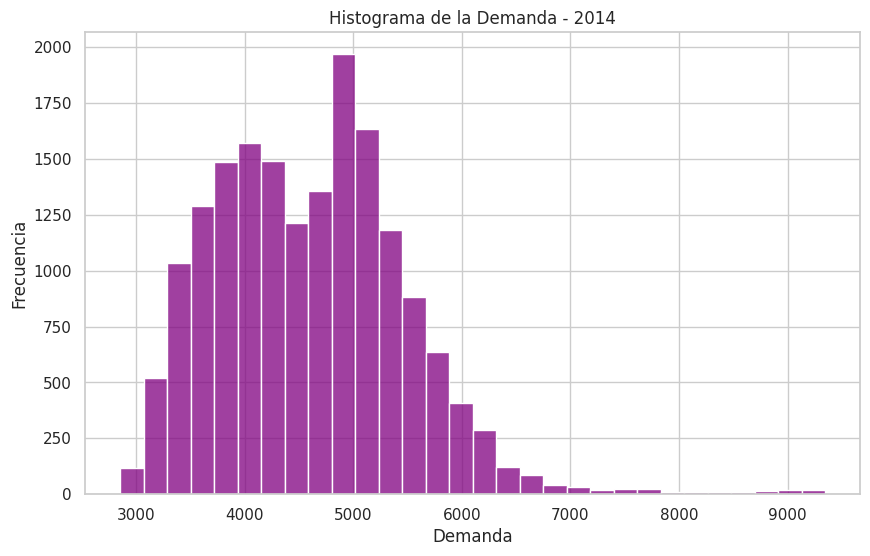

In [ ]:
# Demanda y tempertura en 2014, graficos y analisis (Punto 6)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df2014['Demand'], kde=False, bins=30, color='purple')
plt.title('Histograma de la Demanda - 2014')
plt.xlabel('Demanda')
plt.ylabel('Frecuencia')
plt.show()


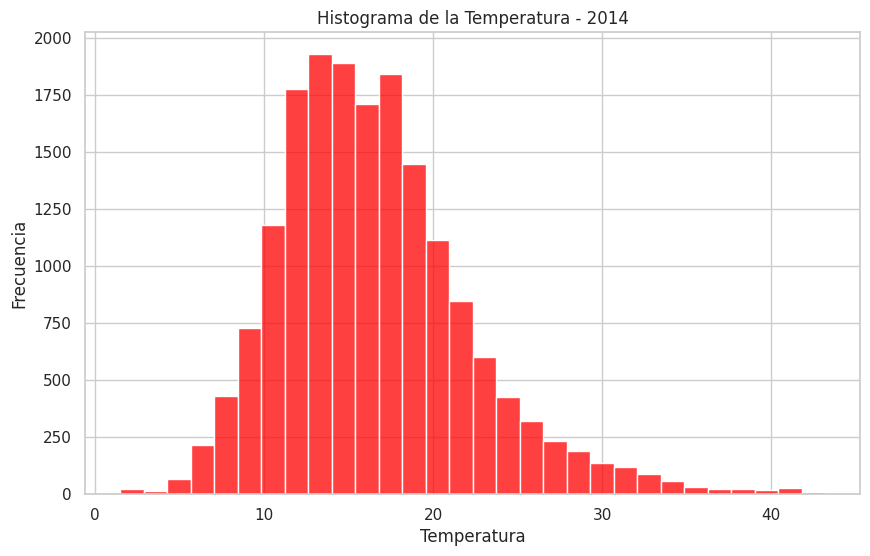

In [ ]:
# Histograma temperature (Punto 6)
plt.figure(figsize=(10, 6))
sns.histplot(df2014['Temperature'], kde=False, bins=30, color='red')
plt.title('Histograma de la Temperatura - 2014')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
# Correlacion
correlation = df2014['Demand'].corr(df2014['Temperature'])
print(f"Correlación entre Demanda y Temperatura: {correlation:.2f}")

# Media y desviacion estandar de 'Demand'
meanDemand = df2014['Demand'].mean()
stdDemand = df2014['Demand'].std()
print(f"Media de la Demanda: {meanDemand:.2f}")
print(f"Desviación Estándar de la Demanda: {stdDemand:.2f}")

# Media y desviacion estandar de 'Temperature'
meanTemp= df2014['Temperature'].mean()
stdTemp= df2014['Temperature'].std()
print(f"Media de la Temperatura: {meanTemp:.2f}")
print(f"Desviación Estándar de la Temperatura: {stdTemp:.2f}")


Correlación entre Demanda y Temperatura: 0.28
Media de la Demanda: 4609.94
Desviación Estándar de la Demanda: 877.78
Media de la Temperatura: 16.51
Desviación Estándar de la Temperatura: 5.61


In [ ]:
# 1. Calcular el promedio diario de 'Temperature' y 'Demand'
df2014_daily = df2014[['Temperature', 'Demand']].resample('D').mean()
df2014_daily.head()

,Temperature,Demand
Time,,
2014-01-01,20.916667,3649.686705
2014-01-02,18.233333,3923.970742
2014-01-03,17.897917,3939.282511
2014-01-04,16.837500,3620.783056
2014-01-05,17.608333,3536.101000


In [ ]:
# Media movil de 'Temperature' y 'Demand' en 2014 (Punto 7)
df2014_daily['avgDemandMoving_7'] = df2014_daily['Demand'].rolling(window=7).mean()
df2014_daily['avgTemperatureMoving_7'] = df2014_daily['Temperature'].rolling(window=7).mean()

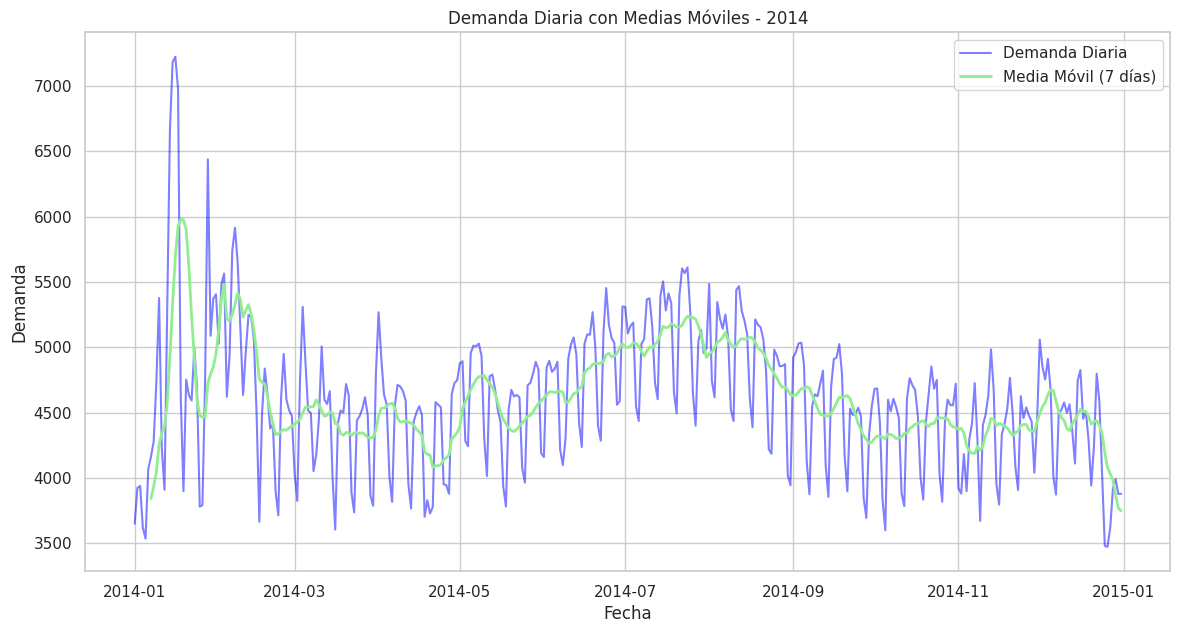

In [ ]:
# Gráfico de la demanda con media móvil
plt.figure(figsize=(14, 7))
plt.plot(df2014_daily['Demand'], label='Demanda Diaria', color='blue', alpha=0.5)
plt.plot(df2014_daily['avgDemandMoving_7'], label='Media Móvil (7 días)', color='lightgreen', linewidth=2)
plt.title('Demanda Diaria con Medias Móviles - 2014')
plt.xlabel('Fecha')
plt.ylabel('Demanda')
plt.legend()
plt.show()

* Se encuentra un mayor comportamiento en los primeros meses del año, donde se puede evidenciar una estacionalidad de los datos puesto que en periodos vacacionales (Febrero y Agosto) suele aumentar bastante la demanda, mientras que, una vez terminado este periodo, la demanda tiende a disminuir.

* Los datos concuerdan con lo esperado, puesto que, al estar en periodos vacacionales, lugares de ocio como parques de atracciones o cines, suelen tener más actividad que en cualquier otra parte del año, esto influye en una mayor demanda en los meses comentados. Por otro lado, concuerda a su vez, puesto que al estar terminando invierno, se puede llegar a tener un mayor consumo por persona para poder mantener calor en sus casas.

* Principio y fin de año, presentan las cifras más bajas en el año, lo que indica que posiblemente la gente no desea salir de sus casas o realizan viajes, lo que disminuye la demanda considerablemente.


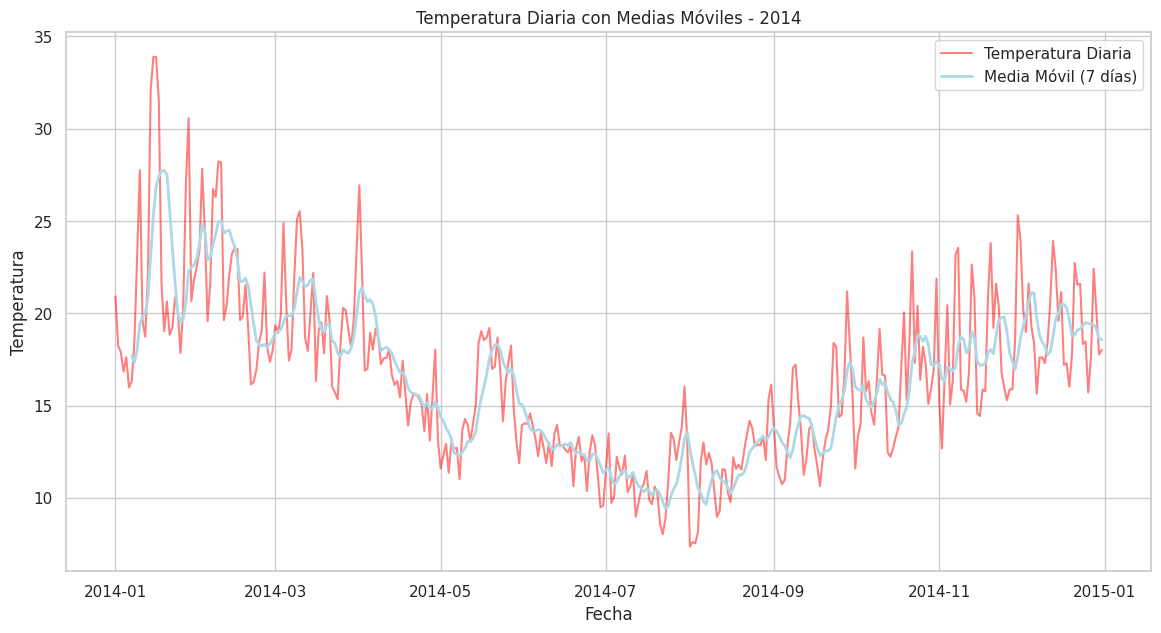

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df2014_daily['Temperature'], label='Temperatura Diaria', color='red', alpha=0.5)
plt.plot(df2014_daily['avgTemperatureMoving_7'], label='Media Móvil (7 días)', color='lightblue', linewidth=2)
plt.title('Temperatura Diaria con Medias Móviles - 2014')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

* Existe una mayor concentracion de datos al rededor de enero finales y febrero incios una mayor concentracion en temperatura. Esto se acompaña, con respecto a la demanda que se encuentra en estos meses del año, puesto que al haber mayor demanda, la temperatura puede incrementarse, esto debido al posible uso de energia para regular la temperatura, siendo un posible verano y habiendo mayor consumo gracias a este fenomeno.

* El mes de agosto presenta las temperaturas menores en todo el año, esto puede deberse al cambio de estación, lo que hace que la gente no necesite de tanta demanda, (cosa que generaria mayores temperturas). Tambien puede deberse al cambio a una estacion fria.

<ipython-input-22-44915ecdde76>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2014[f'Demand_Moving_Avg_{ventana}'] = df2014['Demand'].rolling(window=ventana).mean()


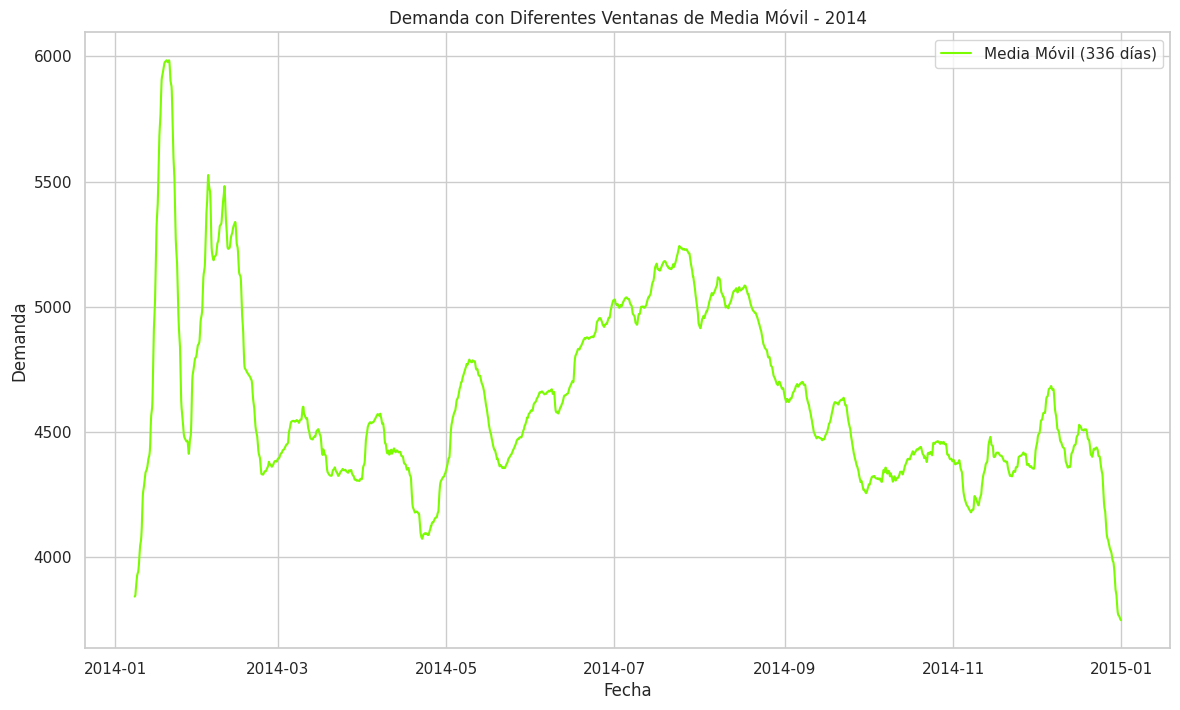

In [ ]:
# Visualizar de manera clara la tendencia entre Temperature y Demand (Punto 8)
ventanas = [336]
colores = ['lawngreen']

plt.figure(figsize=(14, 8))

for i, ventana in enumerate(ventanas):
    df2014[f'Demand_Moving_Avg_{ventana}'] = df2014['Demand'].rolling(window=ventana).mean()
    plt.plot(df2014[f'Demand_Moving_Avg_{ventana}'], label=f'Media Móvil ({ventana} días)', color=colores[i])

#plt.plot(df2014['Demand'], label='Demanda Original', color='crimson', alpha=0.5)
plt.title('Demanda con Diferentes Ventanas de Media Móvil - 2014')
plt.xlabel('Fecha')
plt.ylabel('Demanda')
plt.legend()
plt.show()


<ipython-input-21-8532a8ba072b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2014[f'Temperature_Moving_Avg_{ventana}'] = df2014['Temperature'].rolling(window=ventana).mean()


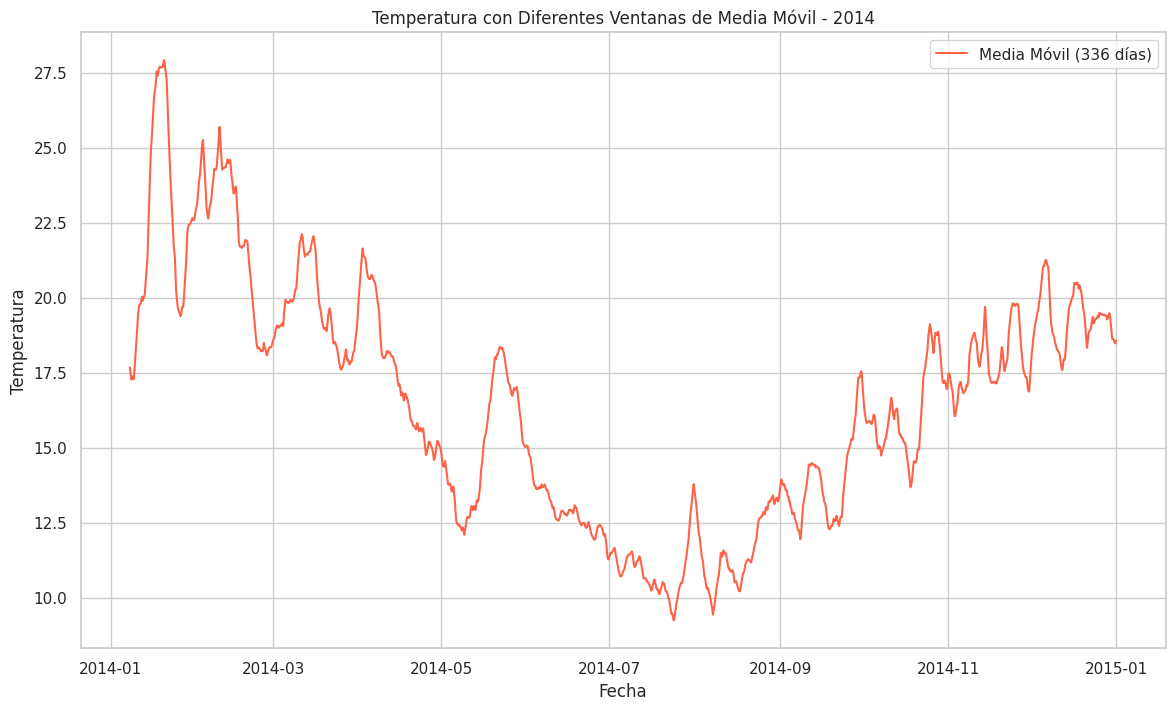

In [ ]:
# Visualizar de manera clara la tendencia entre Temperature y Demand (Punto 8)
ventanas = [336]
colores = ['orchid']

plt.figure(figsize=(14, 8))

for i, ventana in enumerate(ventanas):
    df2014[f'Temperature_Moving_Avg_{ventana}'] = df2014['Temperature'].rolling(window=ventana).mean()
    plt.plot(df2014[f'Temperature_Moving_Avg_{ventana}'], label=f'Media Móvil ({ventana} días)', color=colores[i])

#plt.plot(df2014['Temperature'], label='Temperatura Original', color='grey', alpha=0.5)
plt.title('Temperatura con Diferentes Ventanas de Media Móvil - 2014')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.legend()
plt.show()


**¿Puede encontrar alguna relación entre la temperatura y el consumo de energía a partir de los dos gráficos anteriores**

* Se puede evidenciar en ambos graficos que, en ambos casos, la demanda y temperatura mayor se encuentra en el primer trimestre del año, esto puede significar una correlación entre ambas puesto que al haber una mayor demanda, esto genera un mayor calor, lo que incrementaría la temperatura en general.

* No obstante, ambas gráficas presentan diferentes tendencias, puesto que mientras que la temperatura, suele incrementar luego del periodo vacacional de mitad de año, la demanda suele disminuir desde el periodo vacacional, hasta que ambas llegan a principio de febrero, se disparan ambos datos, y mientras que, la demanda se mantiene estable hasta mitad de año, la temperatura no para de disminuir hasta llegar a mitad de año.

* Esto puede significar muchas cosas y diversas variables a tener en cuenta, sin embargo, viendo la tendencia que tienen ambas graficas a lo largo del año 2014, no tienen una correlación tan fuerte.

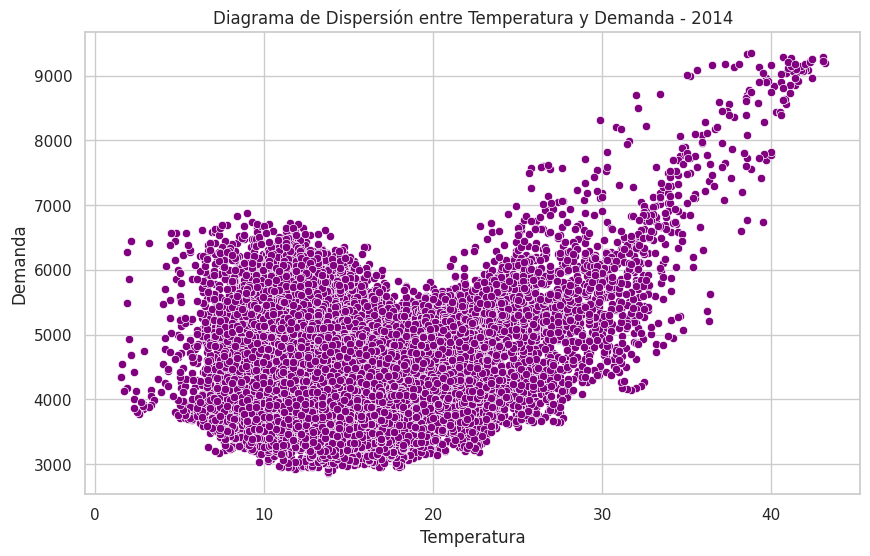

In [ ]:
# Diagrama de dispersión entre Temperature y Demand (Punto 9)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Demand', data=df2014, color='purple')
plt.title('Diagrama de Dispersión entre Temperatura y Demanda - 2014')
plt.xlabel('Temperatura')
plt.ylabel('Demanda')
plt.show()


**¿Qué conclusiones podemos obtener a partir del gráfico?**

* Se encuentra una mayor concentracion en la parte baja izquierda de la grafica, esto indica que no es necesario que haya una demanda tan alta, para que la temperatura se dispare.

* Se encuentran varios outliers, en donde coinciden ambas variables, puesto que en este caso, coincide el que mientras haya una demanda muy alta, la temperatura, a su vez, sera bastante alta

* Alrededor de los 10 a 15 grados, se encuentra una correlacion nula, luego, despues de pasar los 15 grados, se puede observar una correlacion fuerte, en donde a medida que una aumenta, la otra realiza lo mismo. No obstante, luego de los 30 grados, se observa un aumento bastante considerable por parte de ambas variables, que, aunque no alcanza a ser una correlacion lineal, si se puede evidenciar que es positiva.

* Se puede esperar que a medida que haya una mayor temperatura, la demanda aumentará, puesto que se puede llegar a hacer uso de dispositivos electronicos para poder apaciguar el calor en ese momento.



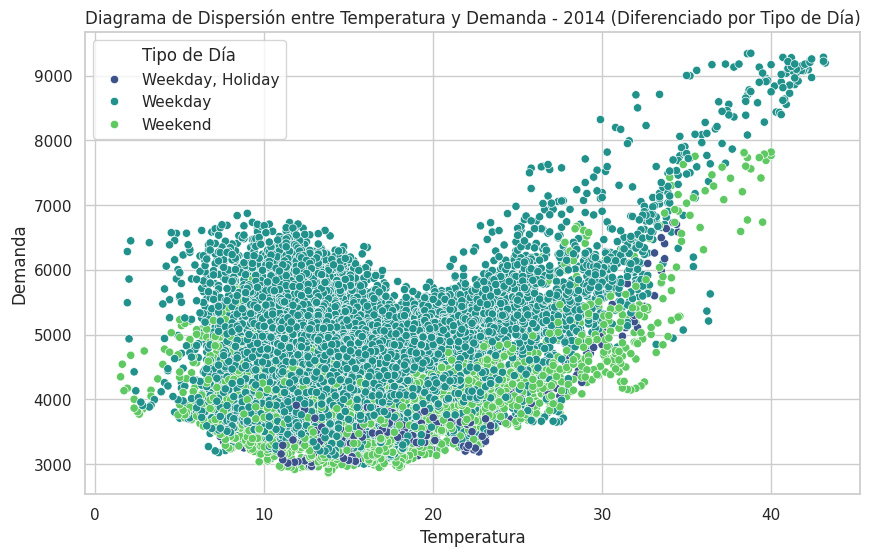

In [ ]:
# Diagrama de dispersión entre Temperature y Demand
# diferenciando por la nueva columna 'Day_Type' (Punto 10)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Demand', hue='Day_Type', data=df2014, palette='viridis')
plt.title('Diagrama de Dispersión entre Temperatura y Demanda - 2014 (Diferenciado por Tipo de Día)')
plt.xlabel('Temperatura')
plt.ylabel('Demanda')
plt.legend(title='Tipo de Día')
plt.show()


**¿Qué conclusiones podemos obtener a partir del gráfico?**

* Las mayores temperaturas se encuentran los dias laborales, en donde, se aumenta considerablemente la demanda, se puede entender puesto que, al estar en horario laboral, en empresas, lugares de estudio o cualquier otro lugar, se use algun dispositivo para regular el calor. Estos dias suelen tener una correlacion positiva luego de superar los 30 grados, antes de eso, se evidencia una correlacion fuerte o debil.

* Se pueden evidenciar picos altos de temperatura y demanda los fines de semana, sin embargo, no es comun que ocurra puesto que, en la mayoria de dias, sin importar que haya una temperatura elevada, no hay mucha demanda.

* Los festivos cuentan con la menor cantidad de datos, sin embargo, al igual que con fines de semana, cuentan con una demanda baja, mientras que la temperatura se mantenga por debajo de 32 grados, luego de superar este rango, la demanda aumenta, pero no es tan considerable el aumento como en los dias laborales. Adicionalmente, a pesar de contar con la menor cantidad de datos, cuentan tambien con la menor temperatura más alta entre los 3 tipos de días. Lo que puede indicar, que la mayoria de festivos, suelen ocurrir en dias laborales.

In [ ]:
# Generar un grafico de dispersion para el dataset us_change.csv (Punto 11)
url = 'https://raw.githubusercontent.com/jpospinalo/time-series/main/us_change.csv'
df_us = pd.read_csv(url)
df_us.head()

,Unnamed: 0,Quarter,Consumption,Income,Production,Savings,Unemployment
0,1,1970 Q1,0.618566,1.044801,-2.452486,5.299014,0.9
1,2,1970 Q2,0.451984,1.225647,-0.551459,7.789894,0.5
2,3,1970 Q3,0.872872,1.585154,-0.358652,7.403984,0.5
3,4,1970 Q4,-0.271848,-0.239545,-2.185691,1.169898,0.7
4,5,1971 Q1,1.901345,1.975925,1.909764,3.535667,-0.1


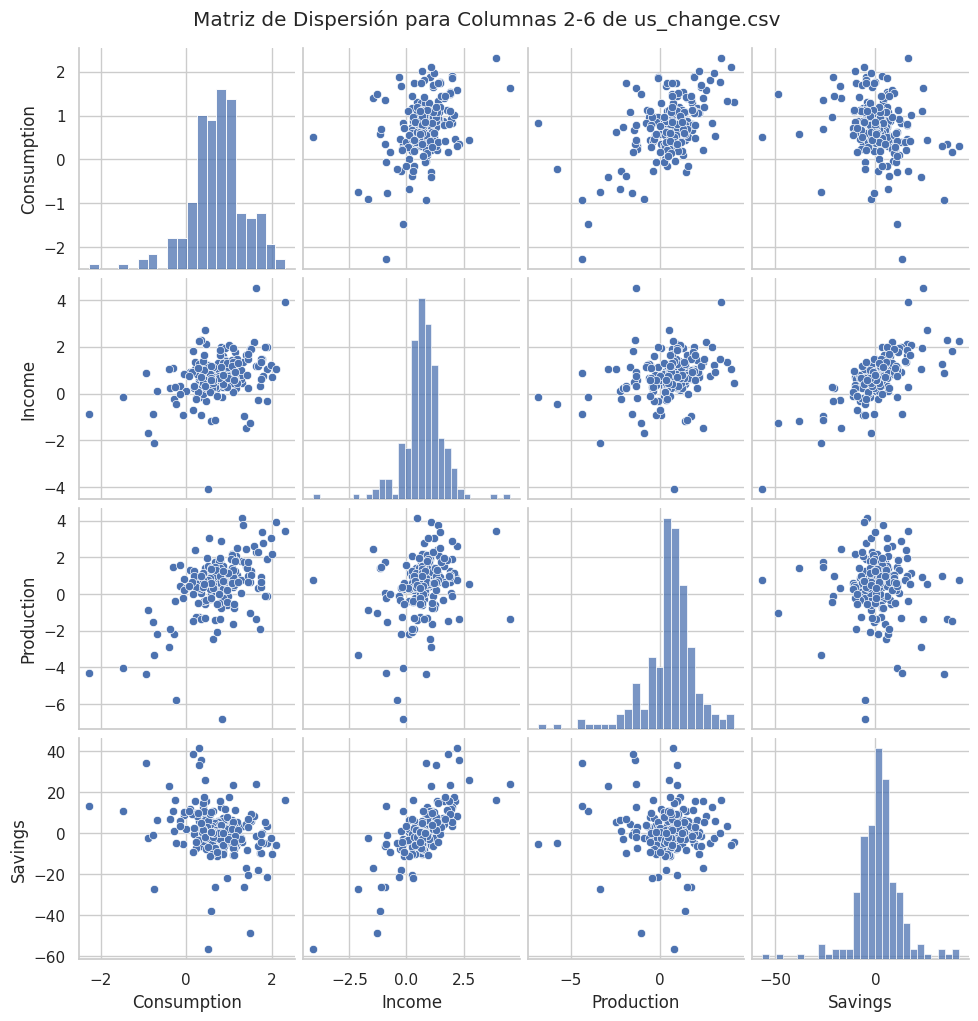

In [ ]:
# Seleccionar columnas de la 2 a la 6
df_us_selected = df_us.iloc[:, 1:6]

# Matriz de dispersión
sns.pairplot(df_us_selected)
plt.suptitle('Matriz de Dispersión para Columnas 2-6 de us_change.csv', y=1.02)
plt.show()

**¿Qué conclusiones podemos obtener a partir del gráfico?**

**Consumption**

* Se puede evidenciar varios outliers con respecto a las otras variables, no obstante, indica una correlacion positiva con respecto la produccion, lo que muestra sentido puesto que a medida de que haya un mayor consumo, debe de haber una produccion mayor. Asimismo, se puede ver que mientras el consumo disminuyem la producción tambien disminuye.

* Por parte de su relacion entre los ingresos, cuenta con una correlacion más neutral, tirando un poco hacia positiva, dando a entender que si no hay tantos ingresos, el consumo puede o no ser bastante.

* A su vez, el consumo y los ahorros cuentan con una correlación neutra, lo que implica que puede haber un consumo bastante grande, sin importar si hay gente con ahorros o no.

**Income**

* Los ingresos cuentan con una correlacion positiva con respecto a los ahorros, esto se entiende gracias a que mientras haya una mayor fuente de ingresos, tambien podran haber mas ahorros.

* Con respecto a la produccion, se encuentra con una correlacion neutral tirando a debil, puesto que, puede que hayan muchos ingresos, sin embargo, si esos ingresos se destinan para otro fin, y no hay un consumo, la producción no se vera afectada en gran manera.

**Production**

* Por el lado de la produccion, se encuentra una correlacion debil con respecto a los ahorros, puesto que si estos ahorros, no se destinan con un fin para consumir, no habra tanta necesidad de la industria para producir. Viendo adicionalmente que, sin importar que la gente tenga muy pocos ahorros o casi ningun ahorro, la produccion aun asi, seguira creciendo, puesto que tiene una mayor correlación con otras variables como el consumo.
